# Having a look at PGN

## Install Libraries

We will use the following python libraries:
- [`chessdata`](https://pypi.org/project/chessdata/) for loading multi game [PGN files](https://en.wikipedia.org/wiki/Portable_Game_Notation) and getting an overview over the games contained
- [`chess`](https://python-chess.readthedocs.io/en/latest/#) for a proper visualisation of the board
- [`stockfish`](https://pypi.org/project/stockfish/) for qualitative analysis of the board using the stockfish engine

In [1]:
! pip install chessdata --quiet
! pip install chess --quiet
! brew install stockfish --quiet
! pip install stockfish --quiet

Running `brew update --auto-update`...
==> Auto-updated Homebrew!
Updated 2 taps (homebrew/core and homebrew/cask).
==> New Formulae
asmfmt              cekit               g-ls                kin
==> New Casks
hancom-docs

You have 46 outdated formulae and 3 outdated casks installed.



Pythons `stockfish` library requires a path to the stockfish binary, which i had to search manually after installing the package via brew. In my case this path is `'/opt/homebrew/bin/stockfish'`

In [2]:
stockfish_path = '/opt/homebrew/bin/stockfish' 

## Overview over the files
The files provided here contain games from the minor tournaments (`Open21.pgn`, `Open22.pgn` and `Open23.pgn`; [Troisdorf Open](https://sktroisdorf.de/wp/troisdorf-open-2023/), the annual open tournament by the chess club of a small city in Germany) and from their archive of chess magizines (`kombinationen.pgn`, `revistas.pgn`). Here [*kombinationen*](https://en.wikipedia.org/wiki/Combination_(chess)) contains positions from an ongoing game annotations, while *revistas* (spanish for *magazines*) contains records of full games from an archive of south american chess magazines.

In [3]:
import os
import chessdata.etf

cwd = os.getcwd()
directory = os.path.join(cwd, 'Documents', 'chess_data_20231228')
directory = '/Users/admin/Documents/chess_data_20231228'
files = sorted([f for f in os.listdir(directory) if f.endswith('.pgn')])

for f in files:
    path = os.path.join(directory, f)
    pgn = open(path, 'r')
    df = chessdata.etf.pgn2df(pgn)
    print(f'{f.ljust(18)}: {str(len(df)).rjust(6)} games')

Open21.pgn        :    142 games
Open22.pgn        :    173 games
Open23.pgn        :    227 games
kombinationen.pgn :    511 games
revistas.pgn      :  26857 games


[PGN](https://en.wikipedia.org/wiki/Portable_Game_Notation) are human readable files that consist of a list moves in [Standard Algbraic Notation](https://en.wikipedia.org/wiki/Algebraic_notation_(chess)) and a header containing meta data:

In [4]:
path = os.path.join(directory, files[1])
with open(path) as file:
    df = file.read()
    print(df[0:802])

﻿[Event "Troisdorfer Open 2022"]
[Site "?"]
[Date "????.??.??"]
[Round "?"]
[White "Grabowski, Pawel"]
[Black "Campos, Alberto"]
[Result "1-0"]
[ECO "A46"]
[PlyCount "99"]
[SourceVersionDate "2022.10.26"]

1. d4 Nf6 2. Nf3 e6 3. e3 d5 4. Bd3 c5 5. b3 Nc6 6. O-O Bd6 7. Bb2 O-O 8. Nbd2
b6 9. Ne5 Bb7 10. a3 Rc8 11. f4 Qc7 12. Nxc6 Bxc6 13. dxc5 Be7 14. cxb6 Qxb6
15. Bd4 Qc7 16. Nf3 Nd7 17. Ne5 f5 18. Nxd7 Qxd7 19. Qe2 Bf6 20. Rad1 Qf7 21.
b4 Ba4 22. Bc5 Rfe8 23. Bb5 Bxb5 24. Qxb5 Rb8 25. Qd3 Red8 26. c3 Qc7 27. h3
Rd7 28. Qa6 Kf7 29. Qd3 Rbd8 30. Rf2 g6 31. Rfd2 Ke8 32. Qa6 Kf7 33. Qd3 Ke8
34. a4 Qc6 35. a5 Bg7 36. Rb1 e5 37. Rc2 Rc7 38. Rf1 Qe6 39. Rd2 Rdd7 40. Rfd1
Bf6 41. Rf2 Kf7 42. fxe5 Bxe5 43. Bd4 Kg8 44. b5 Rb7 45. a6 Rb8 46. Bxe5 Qxe5
47. c4 Rbd8 48. Rf4 dxc4 49. Qxc4+ Rd5 50. Rfd4 1-0


`chessdata` can be used to get an overview over the metadata:

In [5]:
pgn = open(path, 'r')
df = chessdata.etf.pgn2df(pgn)
df

,Event,Site,Date,Round,White,Black,Result,ECO,PlyCount,SourceVersionDate,WhiteElo,BlackElo,EventDate,EventType,EventCountry,WhiteTeam,BlackTeam
0,Troisdorfer Open 2022,?,????.??.??,?,"Grabowski, Pawel","Campos, Alberto",1-0,A46,99,2022.10.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Troisdorfer Open 2022,?,????.??.??,?,"Trube, Dieter","Gramb, Marius",0-1,A35,66,2022.10.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Troisdorfer Open 2022,?,????.??.??,?,"Schwarz, Andreas","Memmesheimer, Thomas",1-0,D11,59,2022.10.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Troisdorfer Open 2022,?,????.??.??,?,"Lichtenberg, Friedrich","Schott, Guido",0-1,B07,66,2022.10.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Troisdorfer Open 2022,?,????.??.??,?,"Schmidt, Kevin","Bentlage, Martin",1-0,B18,55,2022.10.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,Troisdorf open,Troisdorf,2022.12.13,7.21,"Arnoldi, Ekkehard","Bruhn, Günther",0-1,NaN,72,2022.10.26,1334,1407,2022.??.??,NaN,NaN,SVigung 1920 Plettenbe,SV Turm Sankt Augustin
169,Troisdorf open,Troisdorf,2022.12.13,7.22,"Günther, Ralf","Andernach, Heinz",1-0,NaN,0,2022.10.26,1318,1365,2022.??.??,NaN,NaN,SV Turm Sankt Augustin,1. Schach-Klub Troisdorf e. V.
170,Troisdorf open,Troisdorf,2022.12.13,7.23,"Rattay, Karolin Johanna","Schulz, Sebastian",0-1,NaN,42,2022.10.26,878,NaN,2022.??.??,NaN,NaN,1. Schach-Klub Troisdorf e. V.,NaN
171,Troisdorf open,Troisdorf,2022.12.13,7.24,"Henn, Norbert","Bewersdorff, Christian",1/2-1/2,NaN,57,2022.10.26,NaN,NaN,2022.??.??,NaN,NaN,NaN,1. Schach-Klub Troisdorf e. V.


## Generating renders of the board

To look at a single game we will have to use the less convenient, iterative `chess` style of loading a game. Metadata can be accessed via the the `game.headers`.

In [6]:
import chess.pgn

def load_game(path, index):
    pgn = open(path)
    for i in range(index+1):
        game = chess.pgn.read_game(pgn)
    return game
    
game = load_game(path, 0)
print(f'{game.headers["White"]} vs. {game.headers["Black"]}')

Grabowski, Pawel vs. Campos, Alberto


Iterating throught the moves and pushing them to the board gives us the final position:

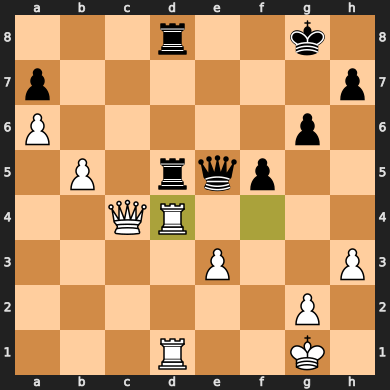

In [7]:
board = game.board()

for move in game.mainline_moves():
    board.push(move)

board

The last move is highlighted via green squares. We can also make `chess` draw arrows. Either between specified squares:

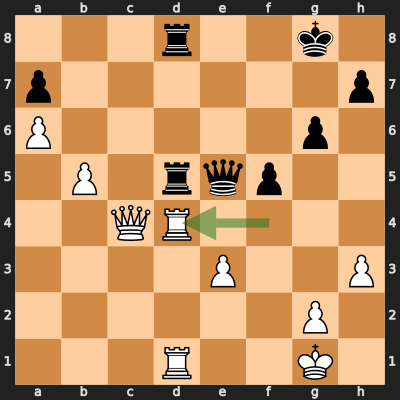

In [8]:
kwargs = {'color':'#888888'} # define color of arrows 
kwargs = {}                  # or back to default
arrows = [chess.svg.Arrow(chess.F4, chess.D4, **kwargs)]

chess.svg.board(board=board, arrows=arrows, size=400)

Or for moves from a game. In this case every move of the game:

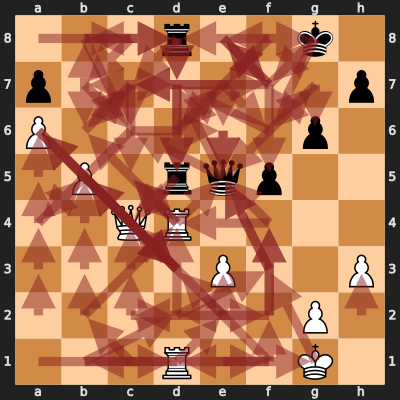

In [10]:
kwargs = {'color':'red'}

arrows = list()
for move in game.mainline_moves():
    arrow = chess.svg.Arrow(move.from_square, move.to_square, **kwargs)
    arrows.append(arrow)

chess.svg.board(board=board, arrows=arrows, size=400)

These images can be saved to a file:

In [24]:
tempfile_name = "test.svg"

board = game.end().board()
boardsvg = chess.svg.board(board=board)

f = open(tempfile_name, "w")
f.write(boardsvg)
f.close()

os.remove(tempfile_name)

chess also allows to render `svg` data for a single chess pieces and add more information to the board (see [here](https://python-chess.readthedocs.io/en/latest/svg.html)). Lastly `chess` also provides a text based view of the board and [FEN](https://en.wikipedia.org/wiki/Forsyth%E2%80%93Edwards_Notation) notation:

In [25]:
# Load the PGN file
pgn_file_path = path
with open(pgn_file_path) as pgn:
    game = chess.pgn.read_game(pgn)

# Iterate through the moves and print the board after each move
board = game.board()
for move in list(game.mainline_moves())[0:3]:
    board.push(move)
    print(board)
    print(board.fen())
    print()


r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . P . . . .
. . . . . . . .
P P P . P P P P
R N B Q K B N R
rnbqkbnr/pppppppp/8/8/3P4/8/PPP1PPPP/RNBQKBNR b KQkq - 0 1

r n b q k b . r
p p p p p p p p
. . . . . n . .
. . . . . . . .
. . . P . . . .
. . . . . . . .
P P P . P P P P
R N B Q K B N R
rnbqkb1r/pppppppp/5n2/8/3P4/8/PPP1PPPP/RNBQKBNR w KQkq - 1 2

r n b q k b . r
p p p p p p p p
. . . . . n . .
. . . . . . . .
. . . P . . . .
. . . . . N . .
P P P . P P P P
R N B Q K B . R
rnbqkb1r/pppppppp/5n2/8/3P4/5N2/PPP1PPPP/RNBQKB1R b KQkq - 2 2



The FEN notation can also be used to pass the position to `stockfish`, which itself has a version of text based render.

In [19]:
from stockfish import Stockfish
stockfish = Stockfish(path=stockfish_path) # path to the stockfish binary, see above (*Install Libraries*)

fen = board.fen()
if stockfish.is_fen_valid(fen): 
    stockfish.set_fen_position(fen)

print(stockfish.get_board_visual())

+---+---+---+---+---+---+---+---+
| r | n | b | q | k | b |   | r | 8
+---+---+---+---+---+---+---+---+
| p | p | p | p | p | p | p | p | 7
+---+---+---+---+---+---+---+---+
|   |   |   |   |   | n |   |   | 6
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   | 5
+---+---+---+---+---+---+---+---+
|   |   |   | P |   |   |   |   | 4
+---+---+---+---+---+---+---+---+
|   |   |   |   |   | N |   |   | 3
+---+---+---+---+---+---+---+---+
| P | P | P |   | P | P | P | P | 2
+---+---+---+---+---+---+---+---+
| R | N | B | Q | K | B |   | R | 1
+---+---+---+---+---+---+---+---+
  a   b   c   d   e   f   g   h



## Analysing a board

[Centipawn score](https://chess.stackexchange.com/a/40240)

> Many chess factors are assigned numbers in the engine’s algorithm. These factors include really simple things, like material, who has more pieces on the board. Other factors include space and mobility (whose pieces can move to, and thus control, more squares), pawn structures (factors such as pawn islands or backward and isolated pawns), King safety (is the opponent’s King in an exposed spot?), and scores of other similar chess ideas. Each factor is assigned a number by the programmer (and different chess programmers assign different values, which is why all chess engines don’t play chess the exact same way)

https://herculeschess.com/how-does-a-chess-engine-work/

`chess` provides tools for for looking up positions in catalogs like the [*Polyglot opening book*](https://python-chess.readthedocs.io/en/latest/polyglot.html) and the [*Gaviota*](https://python-chess.readthedocs.io/en/latest/gaviota.html) and [*Syzygy Endgame tables*](https://python-chess.readthedocs.io/en/latest/syzygy.html).

[Stockfish](https://en.wikipedia.org/wiki/Stockfish_(chess)) is a chess engine, that is used to evaluate a position and to judge the quality of a move. The python package `stockfish` can be used to access the engine from within python. It also has tools to get information on the current board. Here we start from a new game.

In [15]:
from stockfish import Stockfish
stockfish_path = '/opt/homebrew/bin/stockfish' 
stockfish = Stockfish(path=stockfish_path) # path to the stockfish binary, see above (*Install Libraries*)

square = "e1"
print(f'{stockfish.get_what_is_on_square(square).name} on {square.upper()}')
move = "a2a4"
print(f'move {move.upper()} is {stockfish.will_move_be_a_capture(move).name}')

WHITE_KING on E1
move A2A4 is NO_CAPTURE


In [16]:
print(stockfish.get_evaluation())
for move in stockfish.get_top_moves(3): print(move)

{'type': 'cp', 'value': 43}
{'Move': 'e2e4', 'Centipawn': 44, 'Mate': None}
{'Move': 'g1f3', 'Centipawn': 36, 'Mate': None}
{'Move': 'd2d4', 'Centipawn': 29, 'Mate': None}


Or on a game that we load via pgn:

In [47]:
import os
import chess.pgn

def load_game(path, index):
    pgn = open(path)
    for i in range(index+1):
        game = chess.pgn.read_game(pgn)
    return game
    
files = sorted([f for f in os.listdir(os.getcwd()) if f.endswith('.pgn')])
path = os.path.join(os.getcwd(), files[1])
game = load_game(path, 0)

board = game.board()
for i, move in enumerate(game.mainline_moves()):
    board.push(move)
    if 45 <= i <= 50: # poor mans slicing
        fen = board.fen()
        stockfish.set_fen_position(fen)
        print('move', i, ':', stockfish.get_evaluation()['value'], 'cp')

move 45 : 76 cp
move 46 : 40 cp
move 47 : 140 cp
move 48 : 101 cp
move 49 : 150 cp
move 50 : 106 cp


With this we can visualise the advantage of white throughout the game:

In [51]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

def load_game(index):
    files = sorted([f for f in os.listdir(os.getcwd()) if f.endswith('.pgn')])
    path = os.path.join(os.getcwd(), files[1])
    pgn = open(path)
    for i in range(index+1):
        game = chess.pgn.read_game(pgn)
    return game
    
def get_cp_series(game):
    cp = []
    board = game.board()
    for i, move in enumerate(game.mainline_moves()):
        board.push(move)
        fen = board.fen()
        stockfish.set_fen_position(fen)
        cp.append(stockfish.get_evaluation()['value'])
    return cp

game = load_game(0)

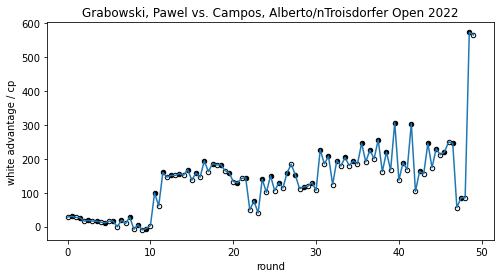

In [121]:
def fig_centipawn_evolution(game, show_grid=False, color_points=True):
    cp = get_cp_series(game)
    x = [i/2 for i in range(len(cp))]
    y = cp

    fig, ax = plt.subplots(figsize=(8,4))
    ax.plot(x, y)
    if show_grid:
        ax.grid(which='major', axis='y')
        ax.xaxis.set_minor_locator(AutoMinorLocator(10))
        ax.grid(which='both', axis='x')
    if color_points:
        ax.scatter(x[::2], cp[::2], s=20, facecolors='white', edgecolors='black')
        ax.scatter(x[1::2], cp[1::2], s=20, facecolors='black', edgecolors='black')
    ax.set_ylabel('white advantage / cp')
    ax.set_xlabel('round')
    ax.set_title(f'{game.headers["White"]} vs. {game.headers["Black"]}/n{game.headers["Event"]}')
    
game = load_game(0)
fig_centipawn_evolution(game)

Would this timeseries look different if we change the analysis depth of stockfish (The default is 15 moves, see [stockfish documentation](https://github.com/zhelyabuzhsky/stockfish))?

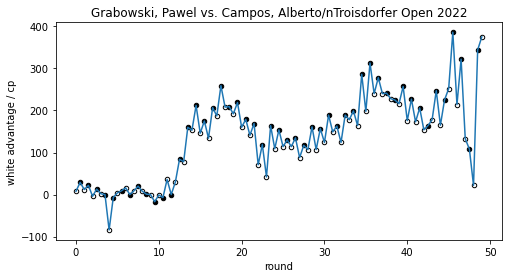

In [122]:
stockfish.set_depth(4)
game = load_game(0)
fig_centipawn_evolution(game)

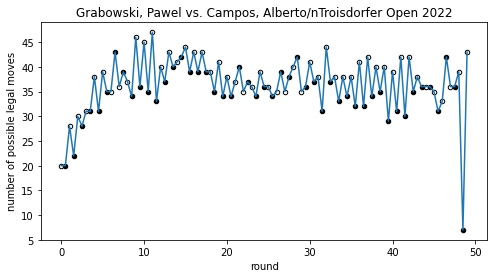

In [124]:
def get_nmoves_series(game):
    nmoves = []
    board = game.board()
    for i, move in enumerate(game.mainline_moves()):
        nmoves.append(len(list(board.legal_moves)))
        board.push(move)
    return nmoves

def fig_nmoves_evolution(game, show_grid=False, color_points=True):
    cp = get_nmoves_series(game)
    x = [i/2 for i in range(len(cp))]
    y = cp

    fig, ax = plt.subplots(figsize=(8,4))
    ax.plot(x, y)
    if show_grid:
        ax.grid(which='major', axis='y')
        ax.xaxis.set_minor_locator(AutoMinorLocator(10))
        ax.grid(which='both', axis='x')
    if color_points:
        ax.scatter(x[::2], cp[::2], s=20, facecolors='white', edgecolors='black')
        ax.scatter(x[1::2], cp[1::2], s=20, facecolors='black', edgecolors='black')
    ax.set_ylabel('number of possible legal moves')
    ax.set_xlabel('round')
    ax.set_title(f'{game.headers["White"]} vs. {game.headers["Black"]}/n{game.headers["Event"]}')
    

game = load_game(0)
fig_nmoves_evolution(game)